In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
winedata = pd.read_csv('train.csv', index_col=0)
winedata.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
user_name,,,,,,,,,,,
NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [3]:
winedata.describe().T

,count,mean,std,min,25%,50%,75%,max
points,82657.0,88.544564,3.099649,80.0,86.0,88.0,91.0,100.0
price,77088.0,36.922232,43.698346,4.0,18.0,27.0,45.0,3300.0


In [4]:
#Cleanup

#Remove rows without prices
winedata = winedata[winedata["price"].notnull()]

#Remove rows without variety
winedata = winedata[winedata["variety"].notnull()]

#Feature Extraction

#Add year column
winedata["year"] = winedata["review_title"].str.extract(r'(\d{4})')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


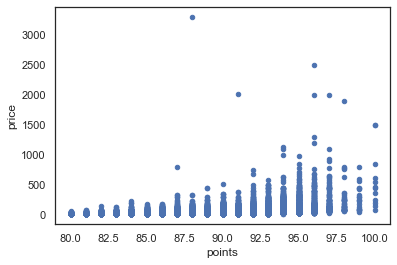

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline
winedata.plot(kind="scatter", x="points", y="price")

In [6]:
#Count of reviews in each wine variety 
value_counts = winedata["variety"].value_counts()
value_counts.head()

Pinot Noir                  10203
Chardonnay                   8859
Cabernet Sauvignon           7485
Red Blend                    6790
Bordeaux-style Red Blend     4238
Name: variety, dtype: int64

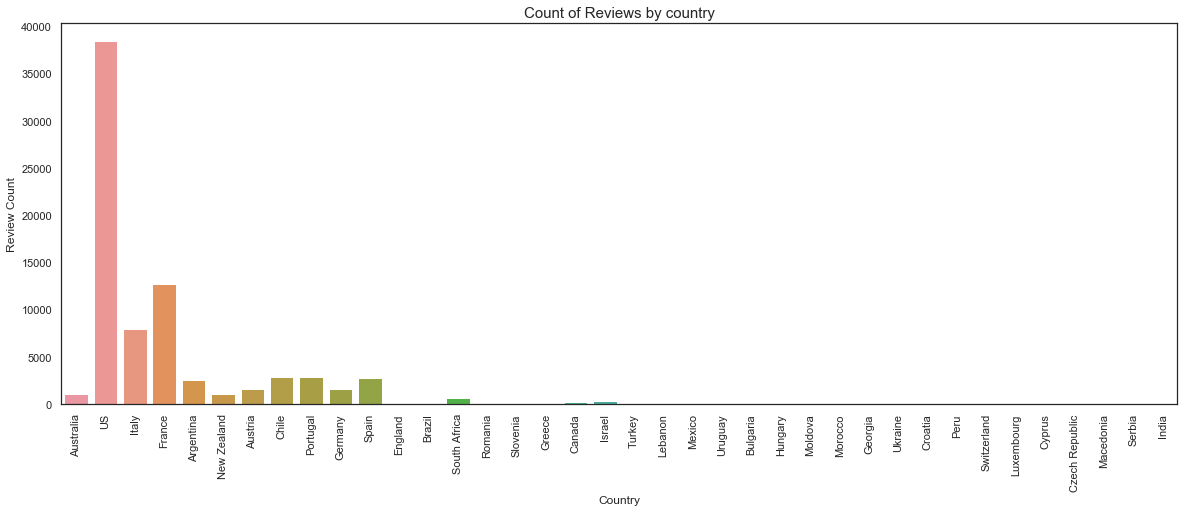

In [7]:
#Wine Review by Country
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
plt.figure(figsize=(20,7))
sns.countplot(x="country", data=winedata)
plt.ylabel("Review Count",fontsize = 12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.title("Count of Reviews by country", fontsize=15)
plt.show()

In [8]:
ReviewCountbyCountry = pd.DataFrame(winedata["country"].value_counts())
ReviewCountbyCountry.describe().T

,count,mean,std,min,25%,50%,75%,max
country,38.0,2027.815789,6535.541314,1.0,11.25,38.0,1069.0,38406.0


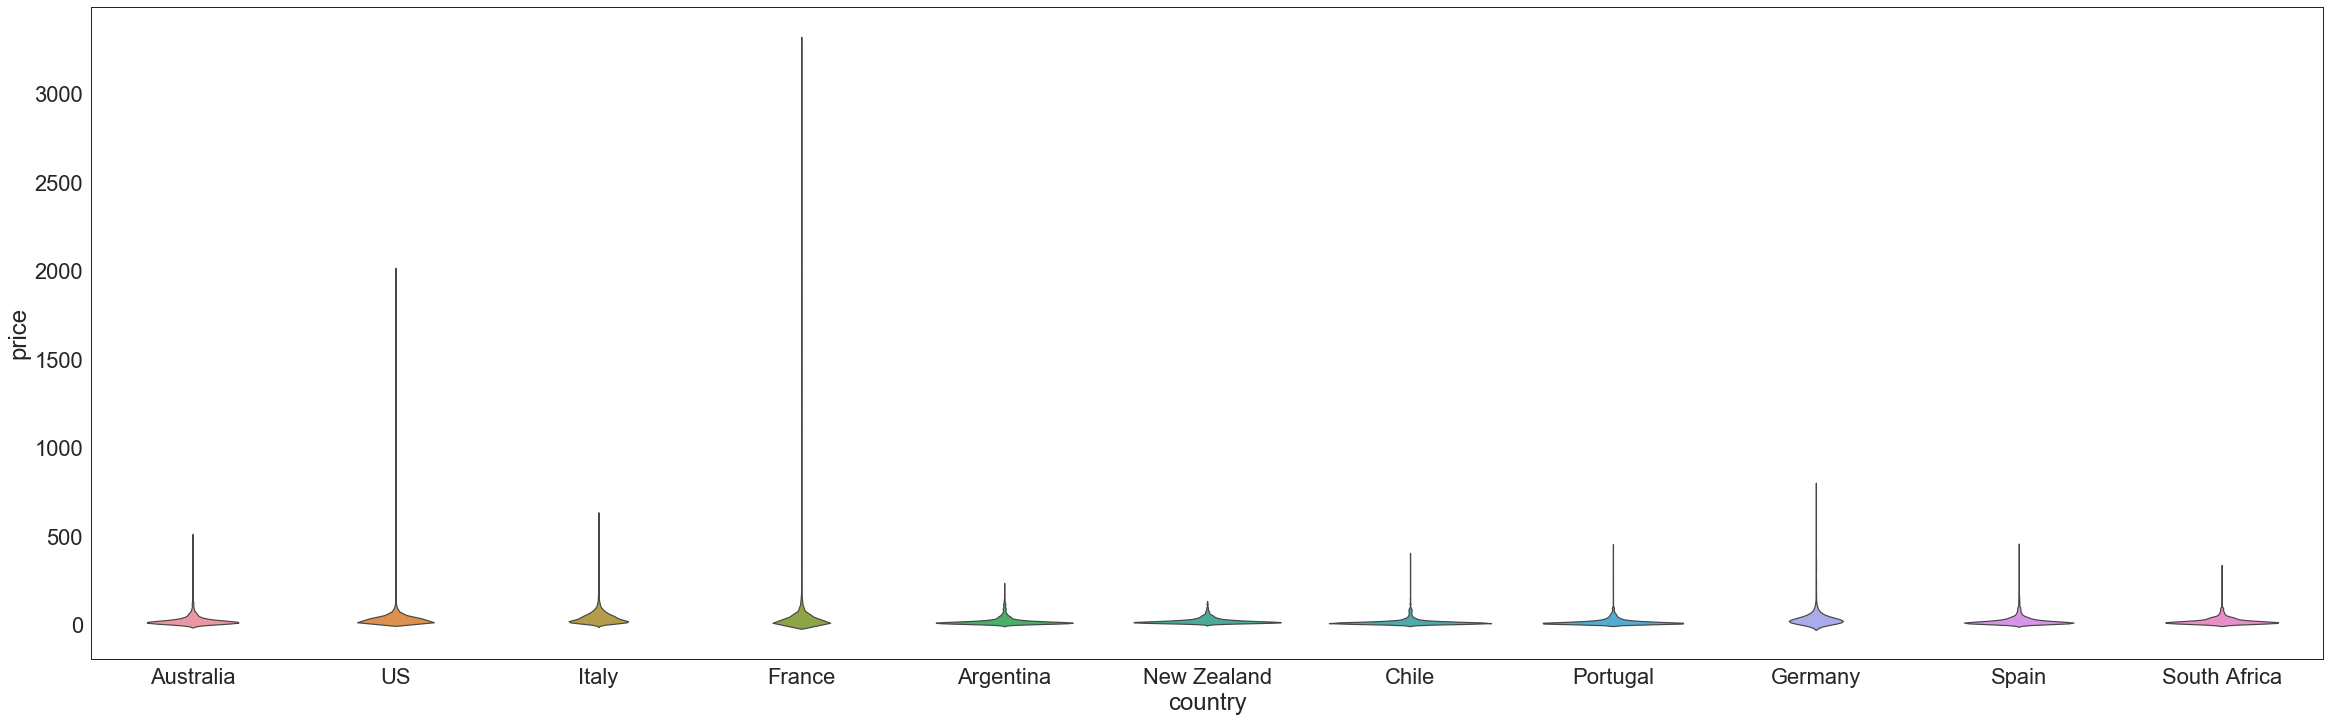

In [9]:
#Top 12 Countries
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_country = winedata[winedata['country'].isin(country_list)]
plt.figure(figsize=(40,12))
sns.set_context("paper", font_scale=2.5)    
sns.violinplot(x="country", y="price", data=sub_country, inner=None)

In [10]:
#Look at the most expensive wine
sub_country[sub_country['price'] == 3300]

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,year
user_name,,,,,,,,,,,,
@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend,2013


In [11]:
#Look at distribution for this type of wine
Bordeaux_style_redblend = sub_country[sub_country['variety'] == 'Bordeaux-style Red Blend']
Bordeaux_style_redblend.describe().T

,count,mean,std,min,25%,50%,75%,max
points,4171.0,88.765284,3.076686,80.0,87.0,89.0,91.0,100.0
price,4171.0,48.022297,101.677820,7.0,19.0,30.0,50.0,3300.0


In [12]:
#Look at 5 wines
Bordeaux_style_redblend.head(5)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,year
user_name,,,,,,,,,,,,
@vossroger,France,Château Castegens 2015 Castillon Côtes de Bor...,Solid tannins mark this out as a wine that wil...,NaN,88,18.0,Bordeaux,Castillon Côtes de Bordeaux,NaN,Château Castegens,Bordeaux-style Red Blend,2015
@vossroger,France,Grand Bourgeau 2012 Blaye Côtes de Bordeaux,"Still dominated by its tannins, this is a full...",NaN,86,18.0,Bordeaux,Blaye Côtes de Bordeaux,NaN,Grand Bourgeau,Bordeaux-style Red Blend,2012
@vossroger,France,Château Rauzan-Ségla 2009 Margaux,"A rich and opulent wine, very ripe, packed wit...",NaN,95,116.0,Bordeaux,Margaux,NaN,Château Rauzan-Ségla,Bordeaux-style Red Blend,2009
@vboone,US,Keating 2013 Finvarra Red (North Coast),"From vineyards across both Napa and Sonoma, th...",Finvarra,92,55.0,California,North Coast,North Coast,Keating,Bordeaux-style Red Blend,2013
@vossroger,France,Château Leboscq 2011 Médoc,"Big, bold and very fruity, this is a black-cur...",NaN,87,18.0,Bordeaux,Médoc,NaN,Château Leboscq,Bordeaux-style Red Blend,2011


In [13]:
#Encoding the labels 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(sub_country['variety'])
label_encoded_y = label_encoder.transform(sub_country['variety'])
sub_country['encoded_winevariety'] = label_encoded_y
sub_country.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,year,encoded_winevariety
user_name,,,,,,,,,,,,,
NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,2007,5
@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,2014,17
NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,2007,11
@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,2010,1
@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,2012,9


In [14]:
tfidf = TfidfVectorizer(
    min_df=10, max_features=500, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(sub_country["review_description"])
features = tfidf.get_feature_names()

In [15]:
X_tfidf_text = tfidf.transform(sub_country["review_description"])
subdata_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata_2.columns = features
sub_country = sub_country.reset_index()
subdata_2['encoded_winevariety'] = sub_country['encoded_winevariety']


In [16]:
#Split into train and test
seed = 7
test_size = 0.3
y = subdata_2['encoded_winevariety']
X = subdata_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=seed)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [18]:
mlp = MLPClassifier()
rf = RandomForestClassifier(n_estimators=160,max_features='sqrt')
lg= LogisticRegression(C=5, max_iter=500)

In [19]:
model_dict = {'MLP classifier':mlp,
             'Random Forest':rf,
             'Logistic':lg}

In [20]:
for model in model_dict.keys():
    model_dict[model].fit(X_train, y_train)
    y_pred = model_dict[model].predict(X_valid)
    
    #Measuring accuracy
    accuracy = accuracy_score(y_pred, y_valid)
    print("{}  - Accuracy: {:.2f}%" .format(model,accuracy * 100.0))

MLP classifier  - Accuracy: 60.64%
Random Forest  - Accuracy: 63.61%
Logistic  - Accuracy: 63.54%


## predicting with testing dataset

In [21]:
winedatatest = pd.read_csv('test.csv', index_col=0)

In [22]:
winedatatest.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
user_name,,,,,,,,,,
@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [23]:
winedatatest.isnull().sum()

country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [24]:
#Add year column
winedatatest["year"] = winedatatest["review_title"].str.extract(r'(\d{4})')
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_country = winedatatest[winedatatest['country'].isin(country_list)]

In [25]:
tfidf = TfidfVectorizer(
    min_df=10, max_features=499, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(sub_country["review_description"])
features = tfidf.get_feature_names()

In [26]:
X_tfidf_text = tfidf.transform(sub_country["review_description"])
subdata_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata_2.columns = features
sub_country = sub_country.reset_index()

In [27]:
X = subdata_2[:]

In [28]:
pred1=rf.predict(subdata_2)

In [29]:
pred1 = pd.DataFrame(pred1, columns=['encoded_winevariety']).to_csv('data1.csv')